In [1]:
import cv2 as cv
import numpy as np
import os
import time
import matplotlib.pyplot as plt

In [2]:
def display_image(window_name, img, window_1_name=None, img_1=None):
    """
    Displays image with given window name.
    :param window_name: name of the window
    :param img: image object to display
    """
    if window_1_name is not None and img_1 is not None:
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap="gray")
        plt.title(window_name)
        plt.subplot(1, 2, 2)
        plt.imshow(img_1, cmap="gray")
        plt.title(window_1_name)
    else:
        plt.imshow(img, cmap='gray')
        plt.title(window_name)
        plt.show()  


## Task 5. Edges
 In this task, we will detect edges in images using the derivative of a Gaussian
kernel. Read the image einstein.jpeg.

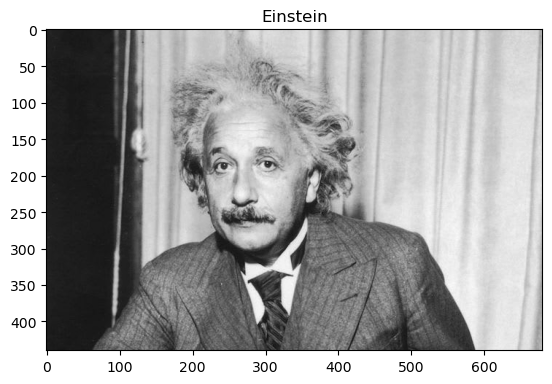

In [4]:
# set imag path
einstein_path = '../data/einstein.jpeg'
# read imgs
einstein = cv.imread(einstein_path, cv.IMREAD_GRAYSCALE)
display_image("Einstein", einstein)

* Compute the weights of the derivative (in x) of a 5x5 Gaussian kernel with
σ = 0.6.
* Compute the weights of the derivative (in y) of a 5x5 Gaussian kernel with
σ = 0.6.

In [14]:
def get_gaussian_derivative_kernel(kernel_size, sigma):
    """
    Returns a 2D Gaussian derivative kernel.
    :param kernel_size: size of the kernel
    :param sigma: sigma value of the kernel
    :return: 2D Gaussian derivative kernel
    """
    kernel_x = np.zeros((kernel_size, kernel_size))
    kernel_y = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - kernel_size // 2
            y = j - kernel_size // 2
            kernel_x[i, j] = -(x / (2 * np.pi * sigma ** 2)) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma))
            kernel_y[i, j] = -(y / (2 * np.pi * sigma ** 2)) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma))
      
    return kernel_x, kernel_y

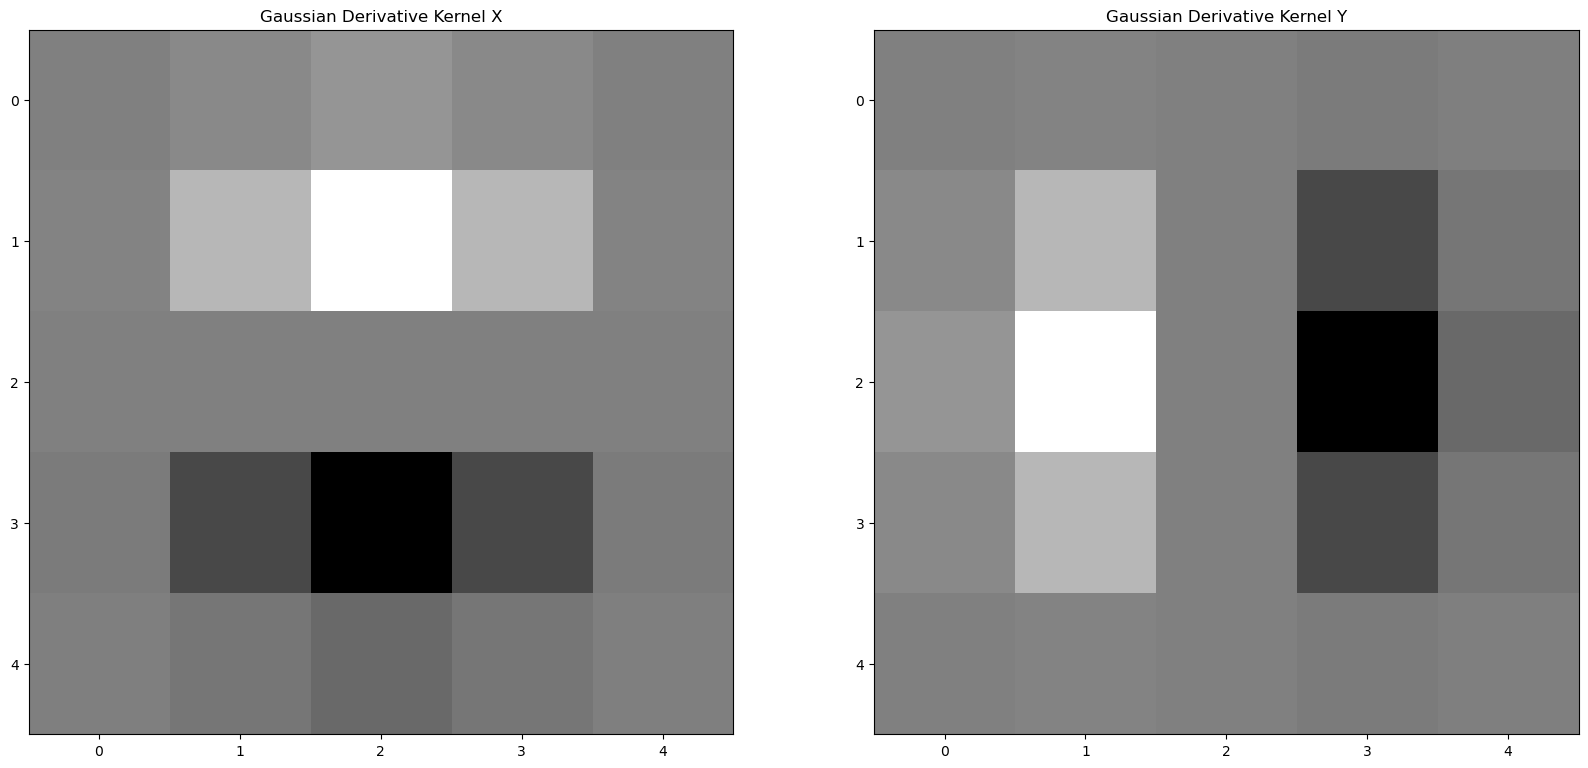

In [16]:
kernel_x, kernel_y = get_gaussian_derivative_kernel(5, 0.6)
display_image("Gaussian Derivative Kernel X", kernel_x, "Gaussian Derivative Kernel Y", kernel_y)

* To get the edges, convolve the image with the kernels computed in previous
steps. You can use cv2.filter2D.

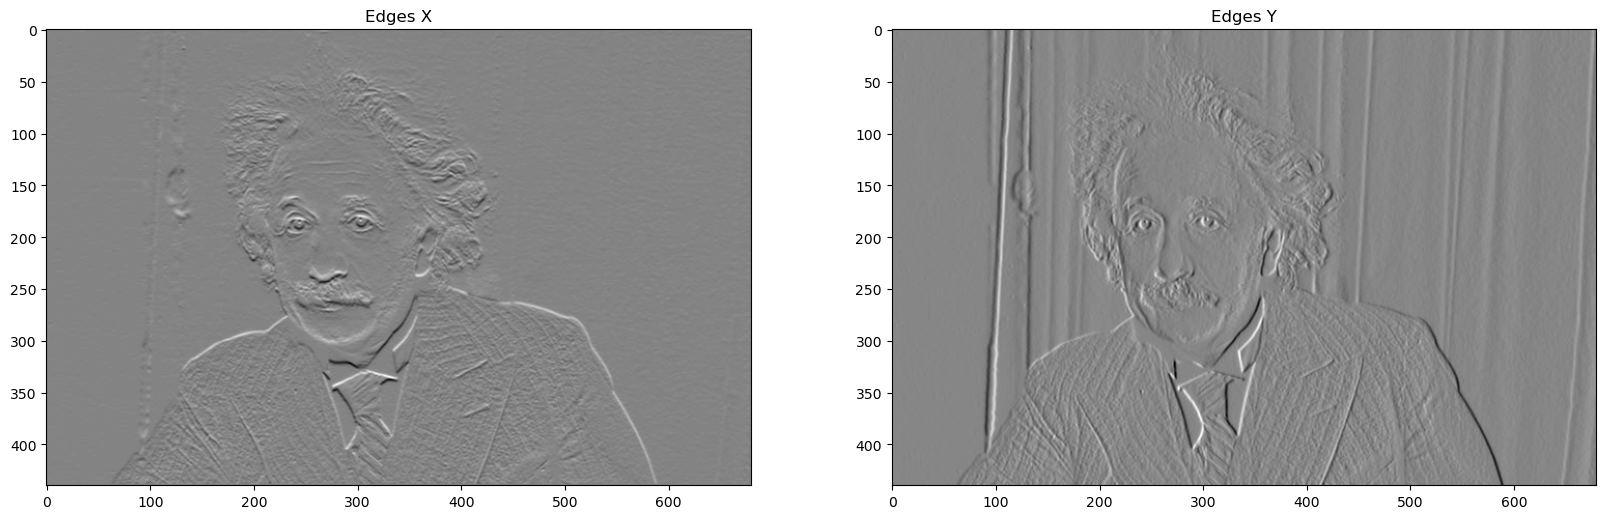

In [24]:
edges_x = cv.filter2D(einstein, ddepth=cv.CV_64F, kernel=kernel_x)
edges_y = cv.filter2D(einstein, ddepth=cv.CV_64F, kernel=kernel_y)

display_image("Edges X", edges_x, "Edges Y", edges_y)


* Compute the edge magnitude and the edge direction (you can use numpy.arctan2).
Visualise the magnitude and direction.

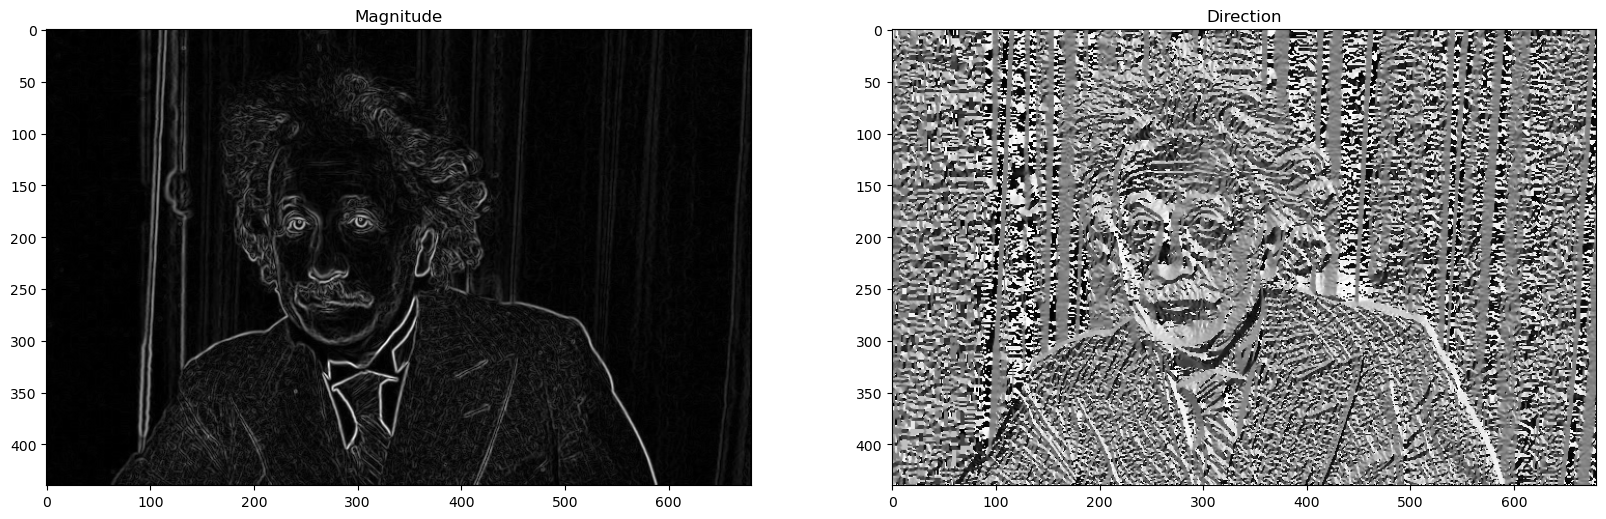

In [26]:
magnitude = np.float32(np.sqrt(edges_x ** 2 + edges_y ** 2))
direction = np.float32(np.arctan2(edges_x, edges_y))

display_image("Magnitude", magnitude, "Direction", direction)